beginbegin# Computer Vision Research

## Research 1 : Scaling images

We have upscaling and downscaling. The consensus says that :
1. **Mitchel** or **Catmull-Rom** algorithm is the best for upscaling
2. **Sinc** and **Lanczos** algorithms are the best for downscaling images

### Upscaling

#### Mitchell-Netravali/BC-Splines

This is a group of 'reconstruction' filters. This really isn't very important unless we're not working with 'superpixelization'.
The formula is ugly to look at to say the least, and a Neural Net approach works much better than the method.

The concept behind this method is to set 2 parameters, which set a kernel size to spread a pixel over, which when 
summed up result in a somewhat blurred but maximized image.

### Downscaling

A formula of major importance is the *sinc* function.
Unnormalized *sinc* is defined as :  
$ sinc(x) = sin(x) / x $

Normalized *sinc* is defined as :  
$ sinc(x) = sin(\pi * x) / (\pi * x)$

#### Lanczos algorithm

The Lanczos algorithm makes use of the *sinc* function in order to create an algorithm that uses a kernelized approach to upscale the image.

The Lanczos kernel takes form of the algorithm :

*L(x)* would equal
1. 0, if x = 0
2. sinc(x)sinc(x/a), if -a <= x < a
3. 1, otherwise

This is used through the interpolation formula of : 

$ S(x) = \sum_{ i = |x| - a + 1 }^{ |x| + a }s_iL(x - i) $

For multidimensional computation, this becomes : 

$ L(x, y) = L(x)L(y) $

for 2D data, and expanded thereafter.


## Research 2 : Speed of statistical path finding for object detection

The concept behind this research is to understand an algorithm around creating  
a dynamically bounding region for identifying objects.

The algorithms is to be devised around the first and second expectations within  
a kernel around the pixel under observation in an iteration.

From the start the algorithm takes a complexity of $ O(n^2 * 8k) $,  
where n is the height * width of the image and k is the kernel size.

The algorithm size is not ideal, but it is good enough to experiment with it for a start.

There will be 2 variations. One with a single channel, one with all three channels in the mix.

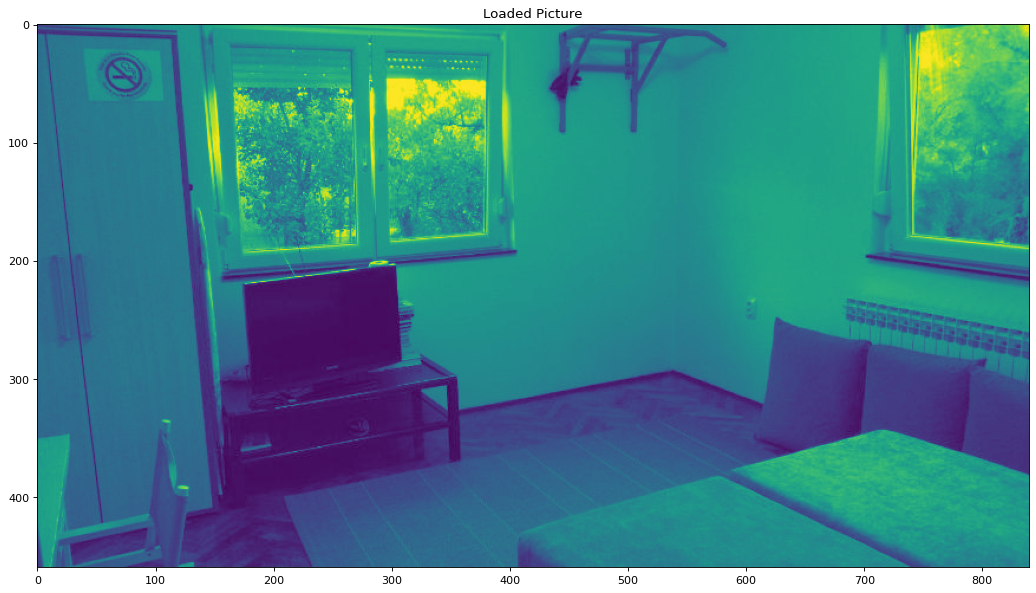

In [1]:
import cv2
import pandas
import matplotlib.pyplot as plt

img = cv2.imread('samples/room_sample01.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(16, 12), dpi=80)
plt.imshow(gray_img)
plt.title('Loaded Picture')
plt.show()

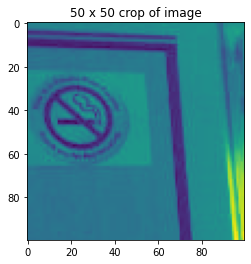

In [2]:
# Observing the first 50x50 pixels

crop1 = gray_img[0:100, 50:150]
plt.imshow(crop1)
plt.title('50 x 50 crop of image')
plt.show()

In [3]:
# def get_heuristics(img, x, y, x_step, y_step, k):
#     val = 0
# #     print(img, x, y, x_step, y_step, k)
#     for i in range(k):
#         x -= x_step
#         y -= y_step
#         if (x >= 0 and y >= 0) or (x <= img.shape[0] and y <= img.shape[1]):
# #             print(str(img[x, y]) + '(' + str(x) + ',' + str(y) + ')', end=", ")
#             val += img[x, y]
# #     print(val)
#     val /= k
#     return val

    
# kernel = 1
# for i in range(crop1.shape[0]) :
#     for j in range(crop1.shape[0]) :
#         # normally the comparisons would be sum(8, 16, 24 , ..., 8k), but since we need to know only the step direction, we simply need to check the 8 cardinal directions
#         arr = []
#         for x_step in range(-1, 2):
#             for y_step in range(-1, 2):
#                 if not (x_step == 0 and y_step == 0) :
# #                     print(x_step, y_step)
#                     arr.append(get_heuristics(crop1, i, j, x_step, y_step, kernel))
#         print(set(arr))
#         break
#     break
        

## Research 3 : Edge Tracking

We have a few edge detection algorithms that are inbuilt in OpenCV to detect edges, such as the famous Canny edge detection.


In [4]:
# Plot graph of a linear row of data to show what edges look like
import numpy
from matplotlib import pyplot
import ipyvolume as ipv

xx, yy = numpy.mgrid[0:crop1.shape[0], 0:crop1.shape[1]]

# fig = pyplot.figure(figsize=(24, 12), dpi=80)
# ax = fig.gca(projection='3d')
# ax.plot_surface(xx, yy, crop1 ,rstride=1, cstride=1, cmap=plt.cm.jet, linewidth=0)

# plt.show()
ipv.figure()
ipv.plot_surface(xx, crop1, yy, color="orange")
ipv.plot_wireframe(xx, crop1, yy, color="red")
ipv.show()

So we can quite easily see that the slopes are what determine the edges of a particular segment.  

One particular instance that is significantly important is the edge of the no-smoking poster that merges with the backdrop of the cupboard.

Can we improve the perpectives by working in the 3 channel segment?

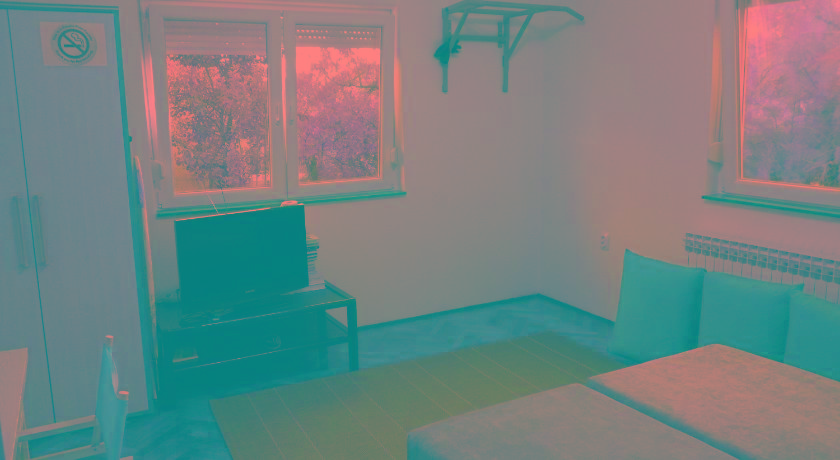

In [7]:
# Convert BGR to CieLab
from PIL import Image
from IPython.display import display

lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
display(Image.fromarray(lab_img))

This looks weird I know, but this is due to RGB getting converted into CIELAB format.
The actual image is unchanged.